In [1]:
# fix for keras v3.0 update
import os
#os.environ['TF_USE_LEGACY_KERAS'] = '1' 

import tensorflow as tf
import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import Sequence
from qkeras import *
import keras_tuner as kt

import sys 
parentdir = os.path.dirname(os.getcwd())
sys.path.insert(0, parentdir) 
from FilteringModel import *

2025-06-16 22:03:50.886228: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-16 22:03:50.899995: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750129430.915123  220616 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750129430.919857  220616 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750129430.931268  220616 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [2]:
from tensorflow.keras.models import Model

# 1. Define the input
x_size = Input(shape=(1,), name="x_size")

# 2. Single Dense layer for binary classification
output = Dense(1, activation="sigmoid", name="output")(x_size)

# 3. Create and compile the model
model = Model(inputs=x_size, outputs=output)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# (Optional) View the model summary
model.summary()


I0000 00:00:1750128644.003485 3588887 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14283 MB memory:  -> device: 0, name: NVIDIA RTX A4000, pci bus id: 0000:4b:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ x_size (InputLayer)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ x_size (InputLayer)             │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

2025-06-12 16:48:46.624243: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144


Epoch 1/10


/home/youeric/miniconda3/envs/mlproj/lib/python3.10/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: x_size
Received: inputs=['Tensor(shape=(None, 1))']
  warnings.warn(msg)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.2835 - loss: 0.6946 - val_accuracy: 0.5550 - val_loss: 0.6927
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.3743 - loss: 0.6943 - val_accuracy: 0.5550 - val_loss: 0.6926
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4161 - loss: 0.6944 - val_accuracy: 0.5550 - val_loss: 0.6925
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4161 - loss: 0.6945 - val_accuracy: 0.5550 - val_loss: 0.6924
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4161 - loss: 0.6947 - val_accuracy: 0.5550 - val_loss: 0.6924
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4161 - loss: 0.6948 - val_accuracy: 0.5550 - val_loss: 0.6923
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4161 - loss: 0.6949 - val_accuracy: 0.5550 - val_loss: 0.6922
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4161 - loss: 0.6950 - val_accuracy: 0.5550 - val_loss: 0.

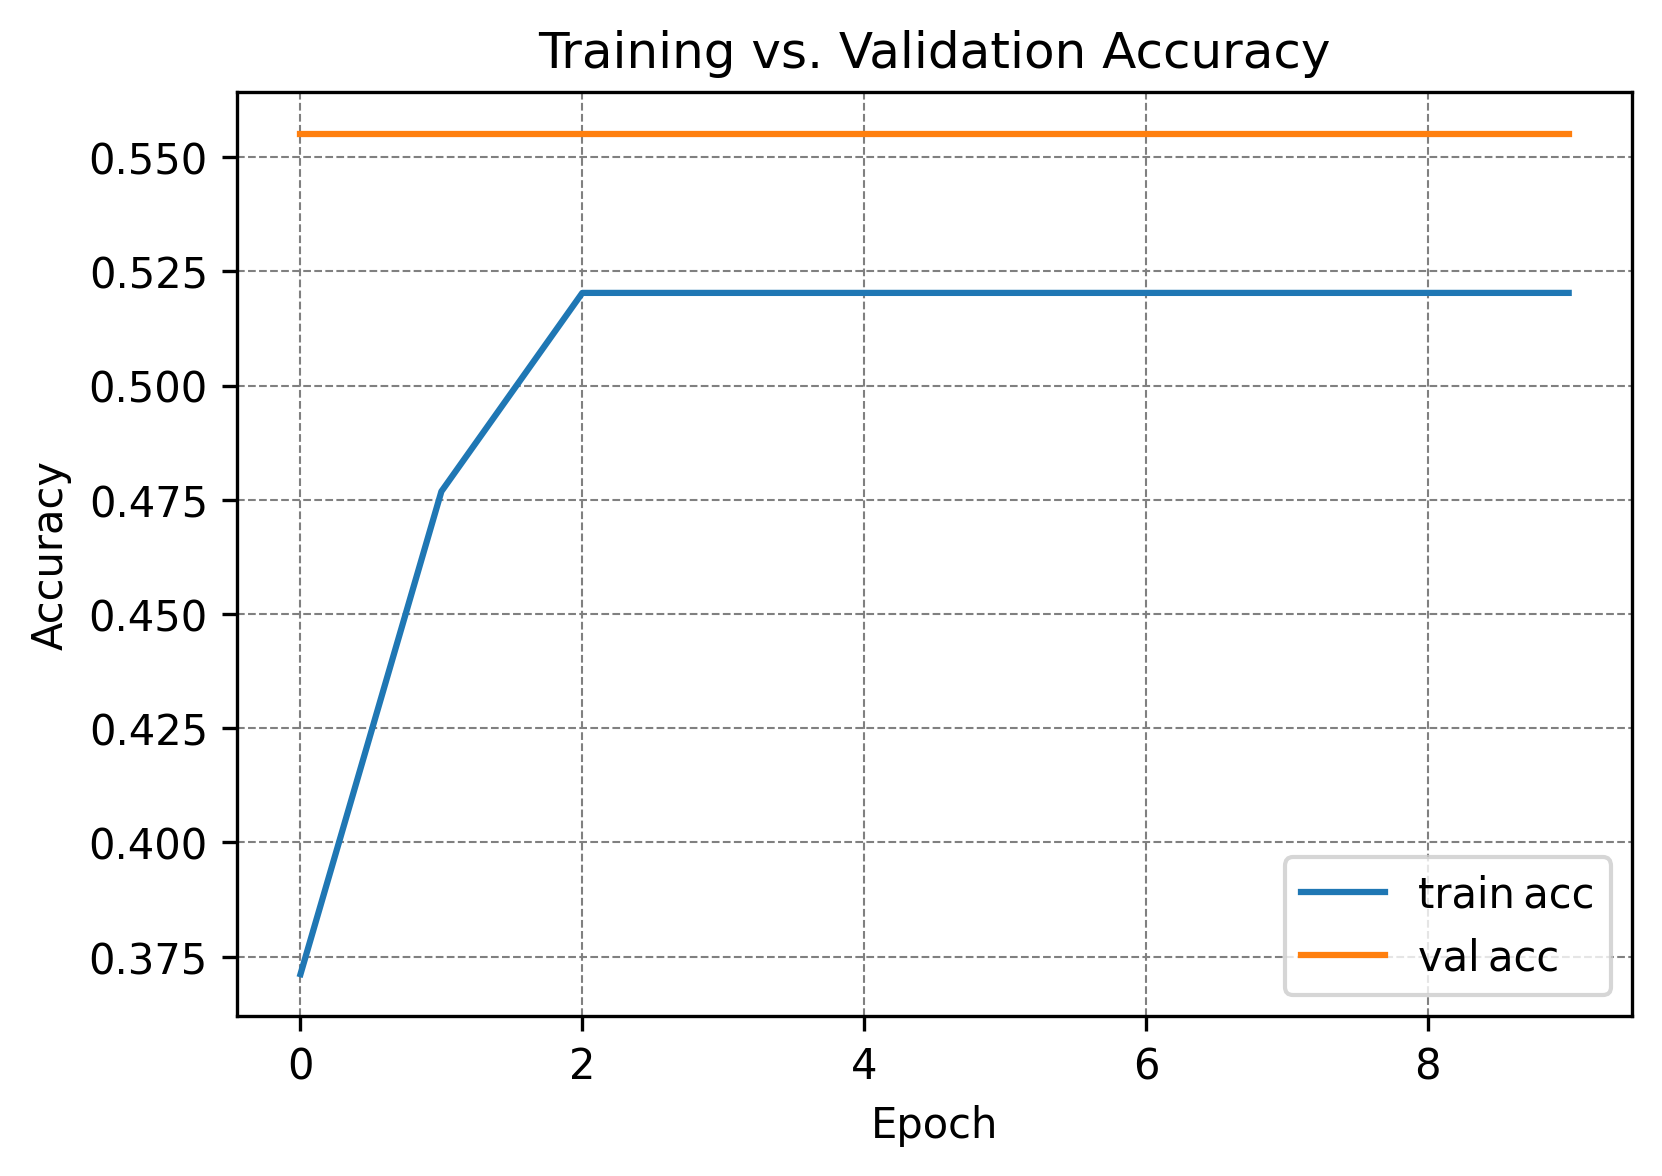

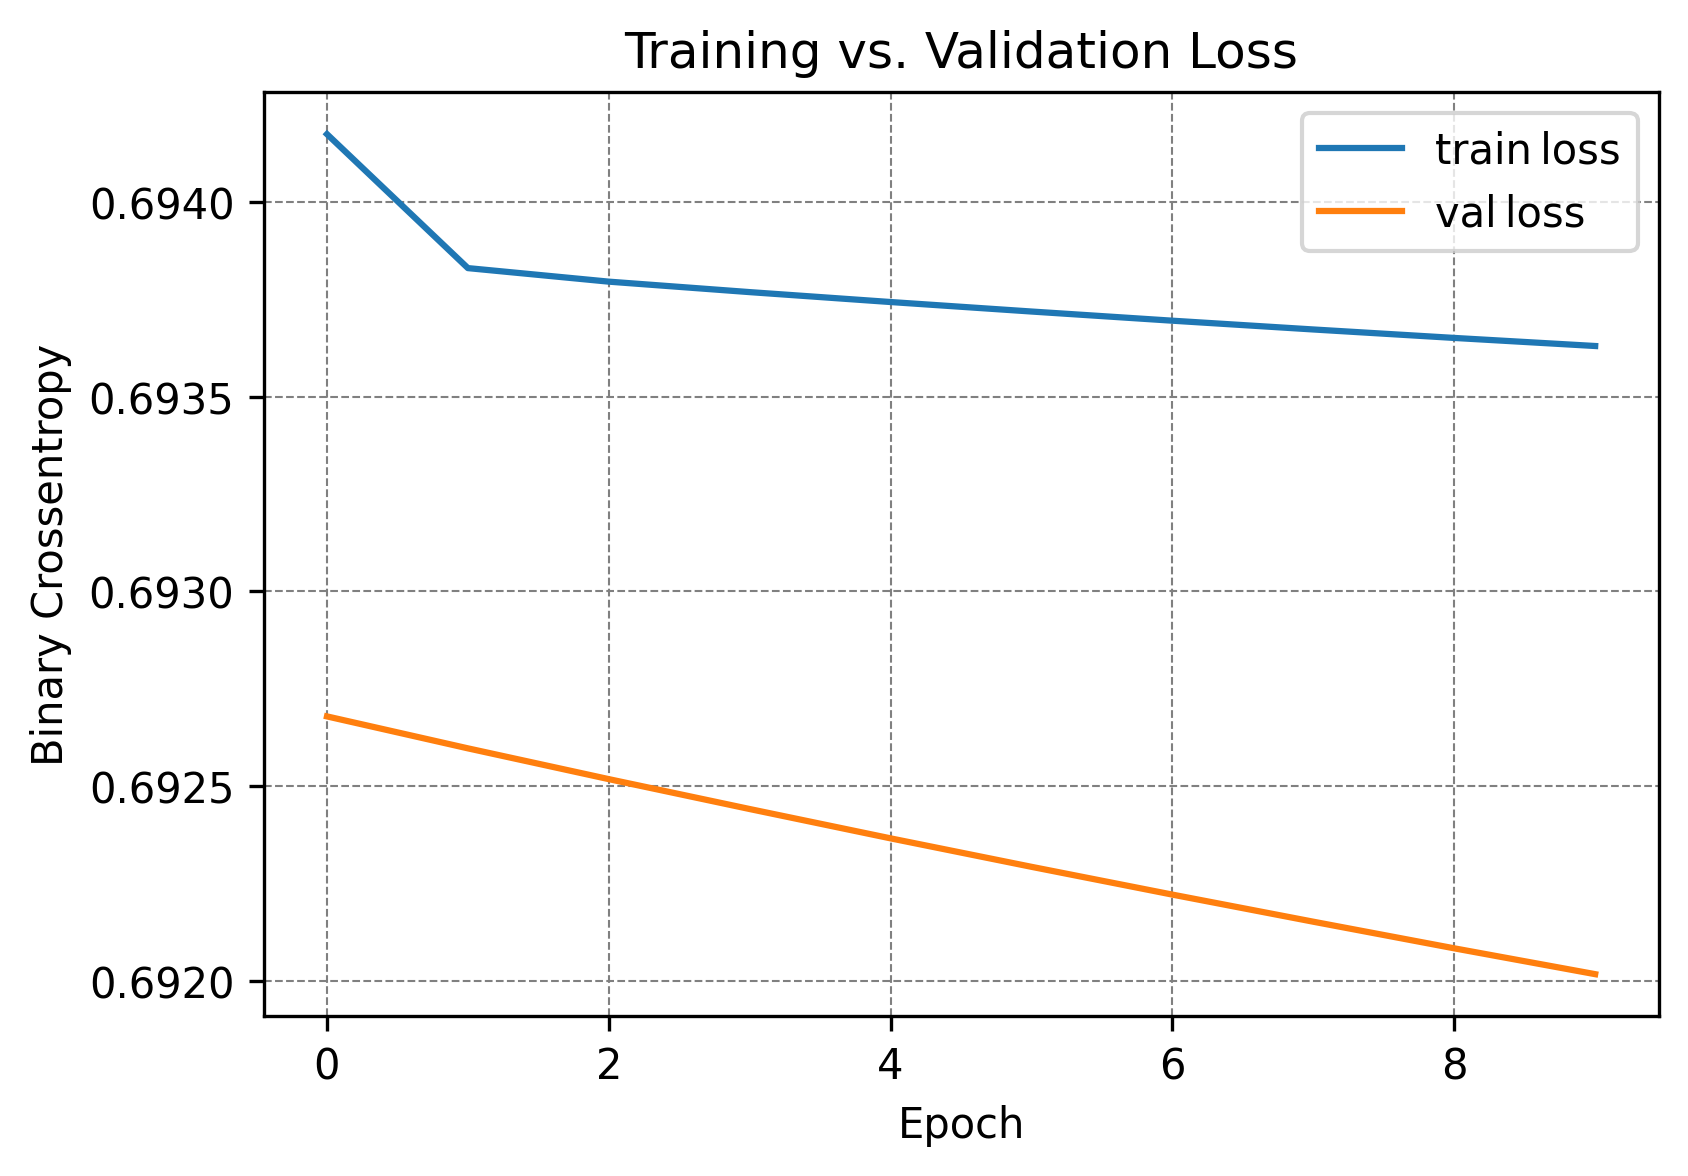

In [ ]:

import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1) Build the simple model:
def CreateSimpleXSizeModel():
    x_size = tf.keras.Input(shape=(1,), name="x_size")
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(x_size)
    model = tf.keras.Model(inputs=x_size, outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateSimpleXSizeModel()
model.summary()

base_dir      = Path("./filtering_records2000")
train_dir     = base_dir / "tfrecords_train"
validation_dir= base_dir / "tfrecords_validation"

train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_size"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_size"]
)

es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot training/validation accuracy and loss:
plt.figure(figsize=(3,2))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(3,2))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()

In [ ]:
# 1) Build the x_size + y_size model:
def CreateSizeModel():
    # two scalar inputs
    x_size = tf.keras.Input(shape=(1,), name="x_size")
    y_size = tf.keras.Input(shape=(1,), name="y_size")
    
    # concatenate into a 2-vector
    concat = tf.keras.layers.Concatenate(name="concat_sizes")([x_size, y_size])
    
    # hidden layers
    h1 = tf.keras.layers.Dense(16, activation="relu", name="hidden_16")(concat)
    h2 = tf.keras.layers.Dense(8, activation="relu", name="hidden_8")(h1)
    
    # output layer for binary classification
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(h2)
    
    model = tf.keras.Model(inputs=[x_size, y_size], outputs=output, name="SizeModel")
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

# instantiate and view summary
model = CreateSizeModel()
model.summary()

# 2) Set up data generators
base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"

train_gen = ODG.OptimizedDataGenerator(
    load_records         = True,
    tf_records_dir       = str(train_dir),
    x_feature_description = ["x_size", "y_size"]
)
val_gen = ODG.OptimizedDataGenerator(
    load_records         = True,
    tf_records_dir       = str(validation_dir),
    x_feature_description = ["x_size", "y_size"]
)

# 3) Early stopping callback
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

# 4) Train
history = model.fit(
    x               = train_gen,
    validation_data = val_gen,
    epochs          = 200,
    callbacks       = [es],
    shuffle         = False,
    verbose         = 1
)

# 5) Plot training history
plt.figure(figsize=(4,3))
plt.plot(history.history["accuracy"],    label="train acc")
plt.plot(history.history["val_accuracy"],label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5)
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(4,3))
plt.plot(history.history["loss"],    label="train loss")
plt.plot(history.history["val_loss"],label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5)
plt.title("Training vs. Validation Loss")
plt.show()

Model: "SizeModel"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ x_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_size (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_sizes        │ (None, 2)         │          0 │ x_size[0][0],     │
│ (Concatenate)       │                   │            │ y_size[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_16 (Dense)   │ (None, 16)        │         48 │ concat_sizes[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_8 (Dense)    │ (None, 8)         │        136 │ hidden_16[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │          9 │ hidden_8[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - accuracy: 0.4196 - loss: 0.6961 - val_accuracy: 0.4450 - val_loss: 0.6929
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5733 - loss: 0.6931 - val_accuracy: 0.4964 - val_loss: 0.6923
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5720 - loss: 0.6934 - val_accuracy: 0.6400 - val_loss: 0.6918
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5136 - loss: 0.6916 - val_accuracy: 0.6326 - val_loss: 0.6915
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5720 - loss: 0.6912 - val_accuracy: 0.6736 - val_loss: 0.6910
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5648 - loss: 0.6907 - val_accuracy: 0.6742 - val_loss: 0.6905
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5774 - loss: 0.6903 - val_accuracy: 0.6739 - val_loss: 0.6902
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5559 - loss: 0.6898

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f39449aee10>>
Traceback (most recent call last):
  File "/home/youeric/miniconda3/envs/mlgpu/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5552 - loss: 0.6898 - val_accuracy: 0.6729 - val_loss: 0.6897
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5560 - loss: 0.6894 - val_accuracy: 0.6730 - val_loss: 0.6893
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5714 - loss: 0.6889 - val_accuracy: 0.6762 - val_loss: 0.6889
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5667 - loss: 0.6883 - val_accuracy: 0.6433 - val_loss: 0.6885
Epoch 12/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5933 - loss: 0.6877 - val_accuracy: 0.6431 - val_loss: 0.6880
Epoch 13/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5935 - loss: 0.6872 - val_accuracy: 0.6431 - val_loss: 0.6880
Epoch 14/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4891 - loss: 0.6881 - val_accuracy: 0.6445 - val_loss: 0.6873
Epoch 15/200
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6197 - loss: 0.6850

In [10]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes y_profile (13×1), flattens, then has a 128-unit hidden layer before the final output:
def CreateYProfileWithHidden128():
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    x = tf.keras.layers.Flatten(name="flatten")(y_profile)
    x = tf.keras.layers.Dense(128, activation="relu", name="hidden_128")(x)
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(x)
    model = tf.keras.Model(inputs=y_profile, outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateYProfileWithHidden128()
model.summary()


# 2) TFRecord directories:
base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"


# 3) Generators loading only "y_profile":
train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["y_profile"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["y_profile"]
)


# 4) EarlyStopping callback:
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)


# 5) Train for 20 epochs:
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot accuracy and loss:
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ y_profile (InputLayer)          │ (None, 13, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 13)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_128 (Dense)              │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,921 (7.50 KB)

 Trainable params: 1,921 (7.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/home/youeric/miniconda3/envs/mlproj/lib/python3.10/site-packages/keras/src/models/functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: y_profile
Received: inputs=['Tensor(shape=(None, 13))']
  warnings.warn(msg)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5445 - loss: 0.9983 - val_accuracy: 0.5958 - val_loss: 0.8100
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4127 - loss: 0.9591 - val_accuracy: 0.6612 - val_loss: 0.6515
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5289 - loss: 0.7612 - val_accuracy: 0.6539 - val_loss: 0.6642
Epoch 4/20
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4818 - loss: 0.7926

KeyboardInterrupt: 

(None, 21)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ x_profile           │ (None, 21, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ y_profile           │ (None, 13, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_x (Flatten) │ (None, 21)        │          0 │ x_profile[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_y (Flatten) │ (None, 13)        │          0 │ y_profile[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat_xy           │ (None, 34)        │          0 │ flatten_x[0][0],  │
│ (Concatenate)       │                   │            │ flatten_y[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_128 (Dense)  │ (None, 128)       │      4,480 │ concat_xy[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1282 (Dense) │ (None, 64)        │      8,256 │ hidden_128[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ hidden_1283 (Dense) │ (None, 64)        │      4,160 │ hidden_1282[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ hidden_1283[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120


2025-06-16 22:40:38.270839: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_165', 12 bytes spill stores, 12 bytes spill loads

2025-06-16 22:40:38.392055: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 100 bytes spill stores, 100 bytes spill loads

2025-06-16 22:40:38.404619: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 48 bytes spill stores, 48 bytes spill loads

2025-06-16 22:40:38.432212: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447_0', 792 bytes spill stores, 792 bytes spill loads

2025-06-16 22:40:38.490056: I external

22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3078 - loss: 1.9064

2025-06-16 22:40:43.028616: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_165', 12 bytes spill stores, 12 bytes spill loads

2025-06-16 22:40:43.108385: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_165', 132 bytes spill stores, 132 bytes spill loads

2025-06-16 22:40:43.167639: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 88 bytes spill stores, 88 bytes spill loads

2025-06-16 22:40:43.193655: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 56 bytes spill stores, 56 bytes spill loads

2025-06-16 22:40:43.194763: I external/loc

29/30 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.3366 - loss: 1.8097

2025-06-16 22:40:47.643378: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33', 12 bytes spill stores, 12 bytes spill loads

2025-06-16 22:40:47.734856: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33', 132 bytes spill stores, 132 bytes spill loads

2025-06-16 22:40:47.888692: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33', 164 bytes spill stores, 168 bytes spill loads



30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 269ms/step - accuracy: 0.3393 - loss: 1.7957 - val_accuracy: 0.6220 - val_loss: 0.7851
Epoch 2/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.3595 - loss: 0.9765 - val_accuracy: 0.6595 - val_loss: 0.6290
Epoch 3/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5494 - loss: 0.7064 - val_accuracy: 0.6642 - val_loss: 0.6177
Epoch 4/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5640 - loss: 0.6943 - val_accuracy: 0.6709 - val_loss: 0.6033
Epoch 5/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5789 - loss: 0.6689 - val_accuracy: 0.6759 - val_loss: 0.5968
Epoch 6/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5867 - loss: 0.6591 - val_accuracy: 0.6771 - val_loss: 0.5941
Epoch 7/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5904 - loss: 0.6501 - val_accuracy: 0.6808 - val_loss: 0.5901
Epoch 8/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5975 - loss: 0.6402 - val_accuracy: 0.6821 - val

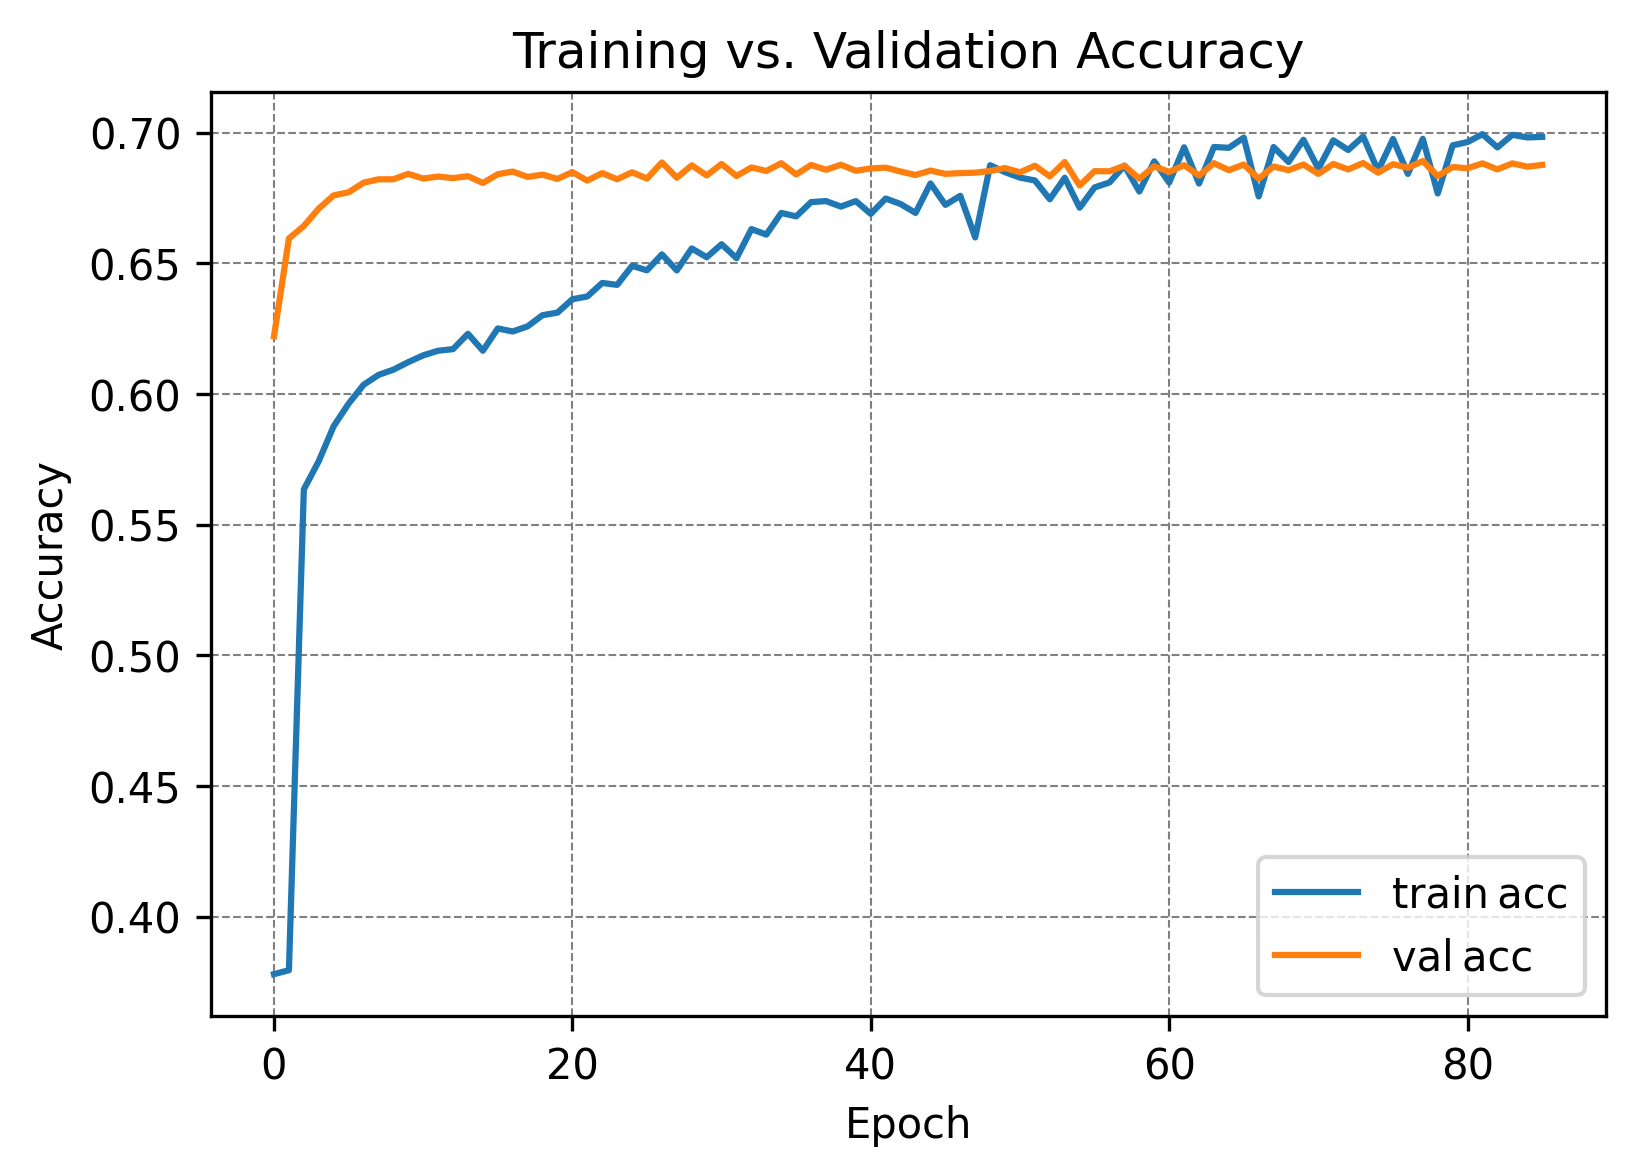

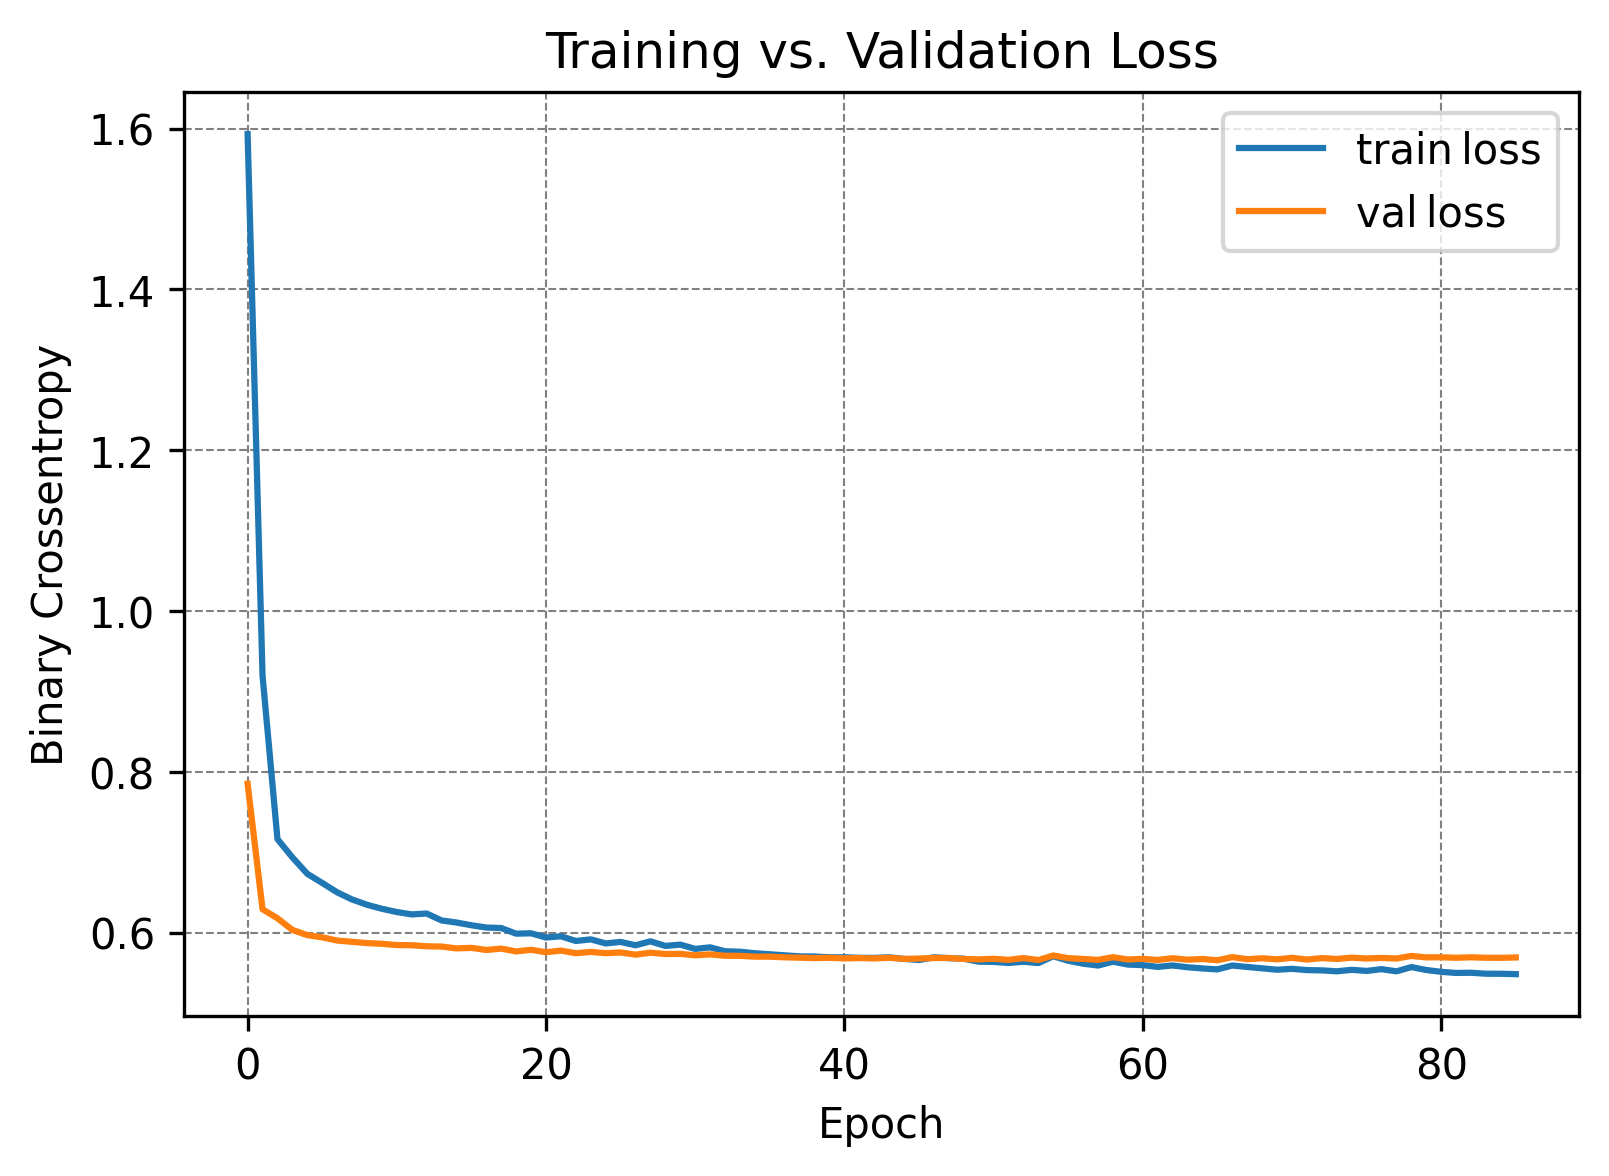

In [5]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes both x_profile (21×1) and y_profile (13×1):
def CreateXYProfileModel():
    x_profile = tf.keras.Input(shape=(21, 1), name="x_profile")
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    
    # Flatten each profile
    x_flat = tf.keras.layers.Flatten(name="flatten_x")(x_profile)    # shape → (21,)
    y_flat = tf.keras.layers.Flatten(name="flatten_y")(y_profile)    # shape → (13,)
    
    print(x_flat.shape)

    # Concatenate into a single vector of length 34
    concat = tf.keras.layers.Concatenate(name="concat_xy")([x_flat, y_flat])
    
    # Hidden Dense(128) layer
    hidden = tf.keras.layers.Dense(128, activation="relu", name="hidden_128")(concat)

    hidden2 = tf.keras.layers.Dense(64, activation="relu", name="hidden_1282")(hidden)
    
    hidden3 = tf.keras.layers.Dense(64, activation="relu", name="hidden_1283")(hidden2)
    # Final sigmoid output
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(hidden3)
    
    model = tf.keras.Model(inputs=[x_profile, y_profile], outputs=output)
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model

model = CreateXYProfileModel()
model.summary()


# 2) TFRecord directories:
base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"


# 3) Generators loading both "x_profile" and "y_profile":
train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_profile", "y_profile"]
)

val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_profile", "y_profile"]
)


# 4) EarlyStopping callback:
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)


# 5) Train for 100 epochs (or adjust as needed):
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=120,
    callbacks=[es],
    shuffle=False,
    verbose=1
)


# 6) Plot training/validation accuracy and loss:
plt.figure(figsize=(6, 4))
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Accuracy")
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Binary Crossentropy")
plt.legend()
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.title("Training vs. Validation Loss")
plt.show()


In [6]:
train_loss, train_acc = model.evaluate(train_gen, verbose=0)
val_loss,   val_acc   = model.evaluate(val_gen,   verbose=0)
print(f"Eval → train acc: {train_acc:.4f}, val acc: {val_acc:.4f}")

print(f"Final train acc: {history.history['accuracy'][-1]:.4f}")
print(f"Final val   acc: {history.history['val_accuracy'][-1]:.4f}")

Eval → train acc: 0.7023, val acc: 0.6877
Final train acc: 0.6983
Final val   acc: 0.6876


In [3]:
import OptimizedDataGenerator4 as ODG
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from pathlib import Path

# 1) Build a model that takes x_profile (21×1) and y_profile (13×1),
#    then two hidden layers (128 → 32) before output.
def CreateXYProfileModel():
    x_profile = tf.keras.Input(shape=(21, 1), name="x_profile")
    y_profile = tf.keras.Input(shape=(13, 1), name="y_profile")
    
    x_flat = tf.keras.layers.Flatten(name="flatten_x")(x_profile)    # → (21,)
    y_flat = tf.keras.layers.Flatten(name="flatten_y")(y_profile)    # → (13,)
    
    concat = tf.keras.layers.Concatenate(name="concat_xy")([x_flat, y_flat])  # → (34,)
    
    hidden1 = tf.keras.layers.Dense(64, activation="relu", name="hidden_128")(concat)
    hidden2 = tf.keras.layers.Dense(16, activation="relu",  name="hidden_32")(hidden1)
    
    output = tf.keras.layers.Dense(1, activation="sigmoid", name="output")(hidden2)
    
    model = tf.keras.Model(inputs=[x_profile, y_profile], outputs=output)
    return model

model = CreateXYProfileModel()


# 2) Instead of a fixed‐LR Adam, create a CosineDecay schedule:
#    - initial_learning_rate = 1e-3 (for example)
#    - decay_steps = total_training_steps (epochs × steps_per_epoch)
#    - alpha = final_learning_rate_fraction (e.g. 0.0 to decay to zero)
#
#    We must know: steps_per_epoch = number of training batches per epoch.
#    Since train_gen yields batches automatically, you can do:
#       steps_per_epoch = len(train_gen)
#    If you plan 100 epochs, total_steps = 100 × steps_per_epoch.

base_dir       = Path("./filtering_records2000")
train_dir      = base_dir / "tfrecords_train"
validation_dir = base_dir / "tfrecords_validation"

train_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(train_dir),
    x_feature_description=["x_profile", "y_profile"]
)
val_gen = ODG.OptimizedDataGenerator(
    load_records=True,
    tf_records_dir=str(validation_dir),
    x_feature_description=["x_profile", "y_profile"]
)

# how many batches per epoch?
steps_per_epoch = len(train_gen)

# choose number of epochs (e.g., 100)
num_epochs = 120

total_steps = steps_per_epoch * num_epochs

# CosineDecay: initial_lr=1e-3, decay_steps=total_steps, alpha=0.0 (ends at 0)
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=total_steps,
    alpha=0.0
)

# Create Adam optimizer with that schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# 3) Compile model with cosine‐decayed learning rate and binary_crossentropy loss:
model.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


# 4) EarlyStopping callback
es = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True
)

# 5) Fit for num_epochs
history = model.fit(
    x=train_gen,
    validation_data=val_gen,
    epochs=num_epochs,
    callbacks=[es],
    shuffle=False,
    verbose=1
)

Epoch 1/120


2025-06-16 22:08:26.804607: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_411', 172 bytes spill stores, 172 bytes spill loads

2025-06-16 22:08:26.906770: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_411', 608 bytes spill stores, 608 bytes spill loads

2025-06-16 22:08:27.471175: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_411', 1064 bytes spill stores, 1064 bytes spill loads

2025-06-16 22:08:27.702937: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_411', 6120 bytes spill stores, 6152 bytes spill loads



22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4351 - loss: 1.6975

2025-06-16 22:08:30.248606: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_411', 152 bytes spill stores, 152 bytes spill loads

2025-06-16 22:08:30.484677: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_411', 604 bytes spill stores, 604 bytes spill loads

2025-06-16 22:08:30.925500: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_411', 1064 bytes spill stores, 1064 bytes spill loads

2025-06-16 22:08:31.174305: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_411', 6056 bytes spill stores, 6104 bytes spill loads



30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.3966 - loss: 1.7357 - val_accuracy: 0.5826 - val_loss: 0.7871
Epoch 2/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.3941 - loss: 0.9229 - val_accuracy: 0.6481 - val_loss: 0.6476
Epoch 3/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5270 - loss: 0.7445 - val_accuracy: 0.6529 - val_loss: 0.6409
Epoch 4/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5266 - loss: 0.7388 - val_accuracy: 0.6583 - val_loss: 0.6311
Epoch 5/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5371 - loss: 0.7252 - val_accuracy: 0.6640 - val_loss: 0.6257
Epoch 6/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5457 - loss: 0.7165 - val_accuracy: 0.6658 - val_loss: 0.6206
Epoch 7/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5499 - loss: 0.7076 - val_accuracy: 0.6667 - val_loss: 0.6166
Epoch 8/120
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.5575 - loss: 0.6990 - val_accuracy: 0.6712 - val_

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


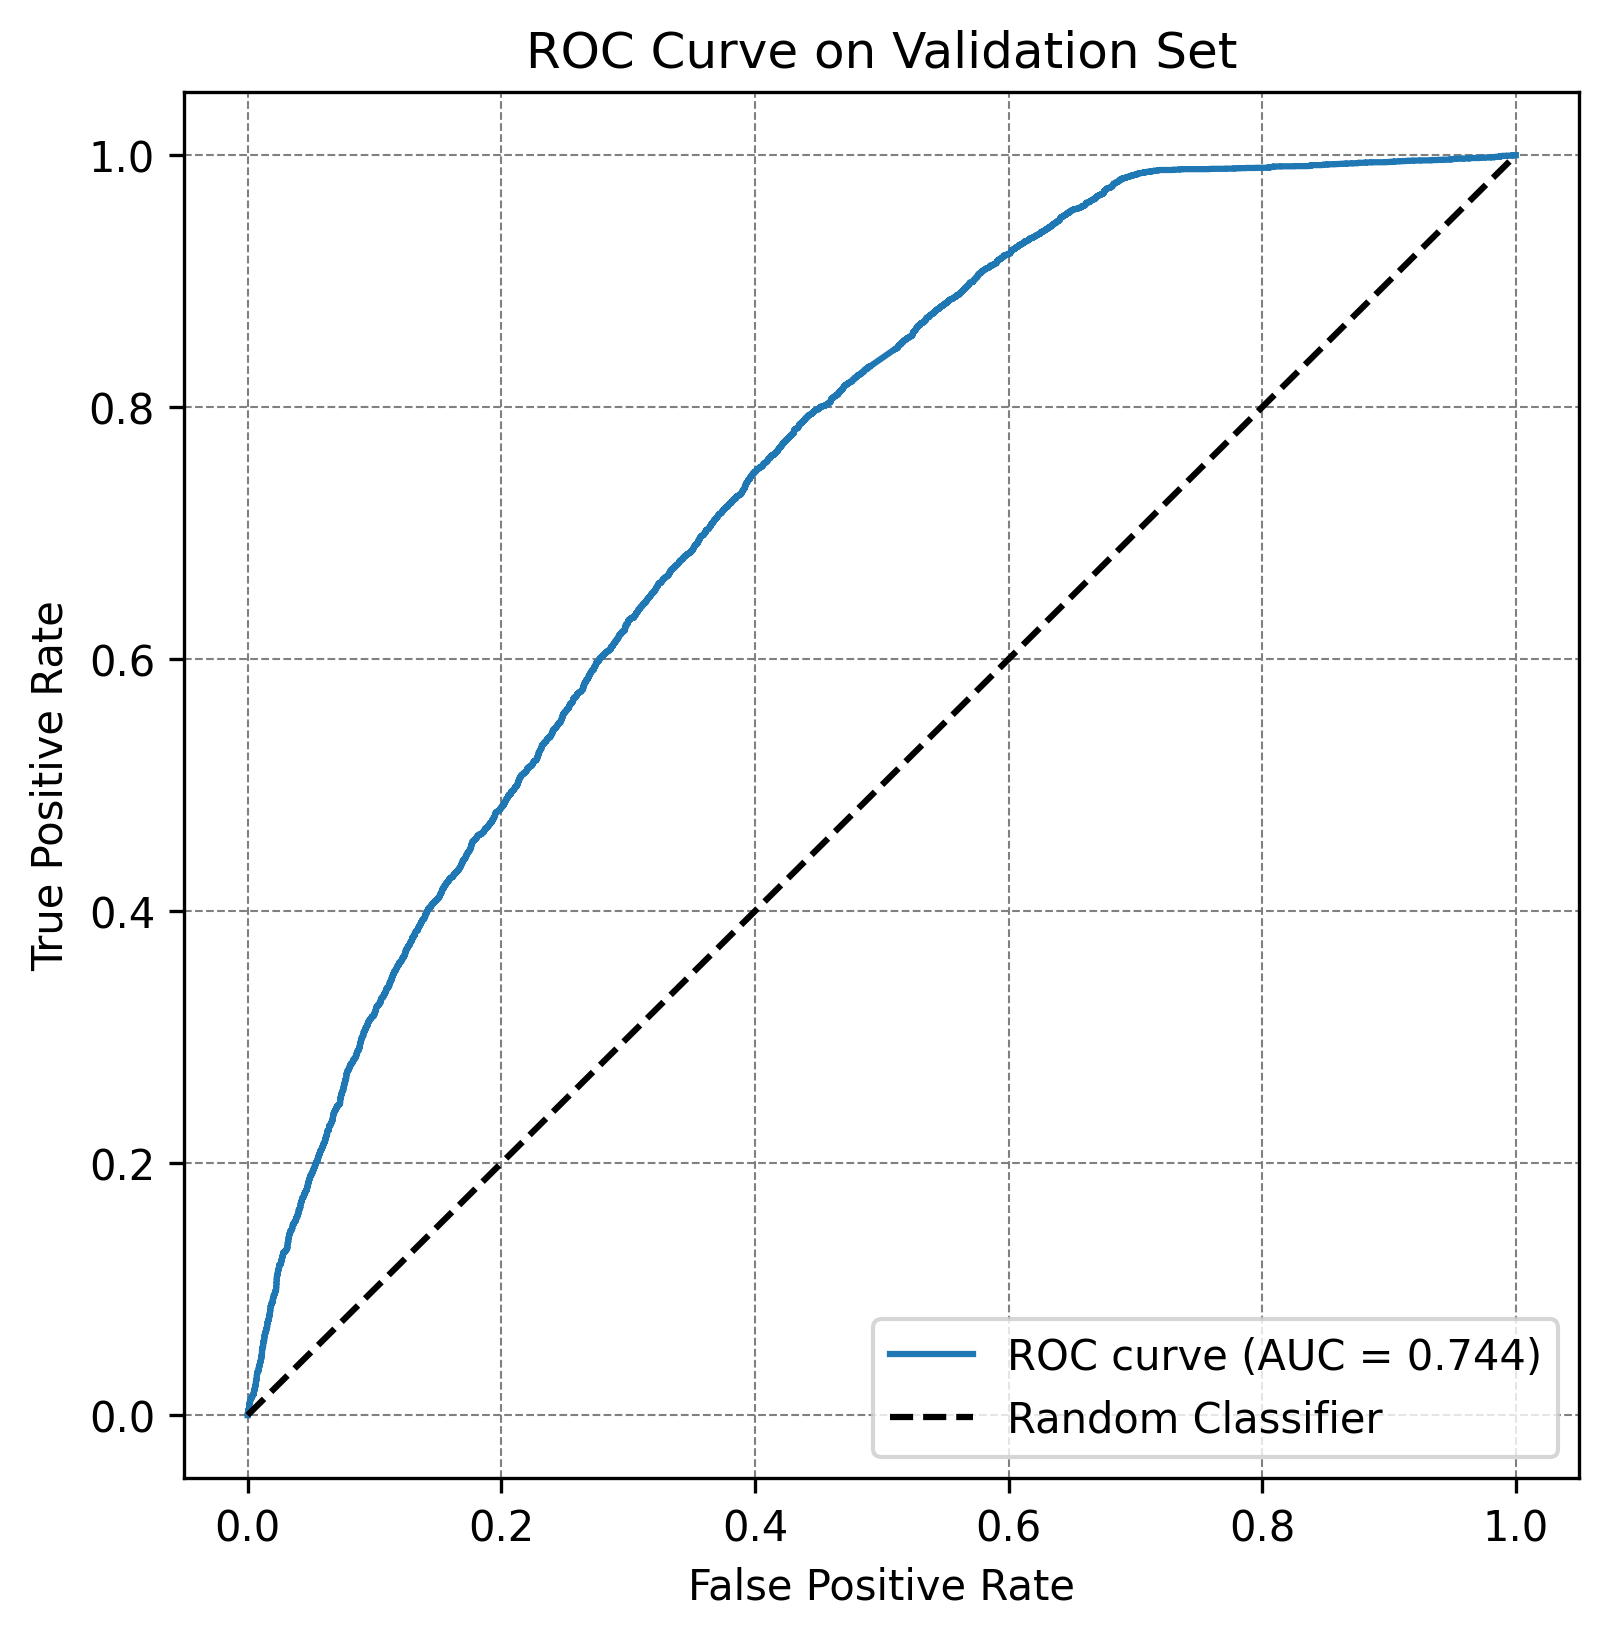

In [4]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# 1) Get predicted probabilities on validation set
y_pred_prob = model.predict(val_gen).flatten()  # shape = (num_val_samples,)

# 2) Collect true labels from val_gen
y_true_list = []
for _, y_batch in val_gen:
    y_true_list.append(y_batch)
y_true = np.concatenate(y_true_list, axis=0).flatten()  # shape = (num_val_samples,)

# 3) Compute ROC metrics
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

# 4) Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve on Validation Set")
plt.legend(loc="lower right")
plt.grid(linestyle="--", linewidth=0.5, color="gray")
plt.show()
